# M3 Materials modelling: a tension experiment in atomistic detail
## Part IB laboratory exercise

2022, Engineering Laboratory, University of Cambridge, Dr. Burigede Liu (bl377) adapted from Prof. Gábor Csányi (gc121)

![bar](./files/copper-bar-zoom.png)

In this exercise you will learn how to model materials on the _atomic scale_, and use the model to investigate how metals respond under tensile stress. Simulating the response in such detail will allow you an insight into what happens on the smallest scales when a material is under load, how the Poisson ratio arises. At the end of the exrcise, you will see an example of how dislocations are generated and interact, which is the basis for the plastic response of the material. Large scale plasticity is of course more complicated, and depends on the interactions of an immense number of dislocations as well as grain boundaries and more rigid inclusions. 

In the course of the exercise, you will:

1. Create and manipulate atomic scale structural models of crystalline matter
1. Learn how to compute simple elastic properties of single crystal copper (Cu)
1. Observe a strain controlled tensile test simulation of a notched bar, and the nucleation of dislocations

This activity introduces you to _scientific computing_, the use of programming and numerical techniques to model, investigate and learn about a technical subject, in this case materials engineering. There is no extended programming required, and no significant software engineering skills introduced, beyond close reading of documentation. 

## Working on your own

This is a purely computational laboratory exercise, with no assigned laboratory time. You will be working on your own, but there is a forum on Moodle where you can get guidance and help if you have any technical questions or if you get stuck. It is monitored daily by demonstrators, especially between 2-3pm.

The [assigned times](https://deepnote.com/project/IB-Laboratory-M3-Materials-modelling-AqUdtvyXQVG1F2SCyP33lA/%2FM3_lab_schedule_Mich.pdf) in the rota are for *marking*, and serve as __deadlines__. You are encouraged to not leave things to the last minute, and you can get marked up for this lab at the DPO helpdesk any time before the deadline assigned to your lab group. 


## Software Environment

You will be using a python package called [Atomic Simulation Environment](https://gitlab.com/ase/ase) (ASE), which you will need to download if you want to run this notebook on your own computer. It has excellent tutorials at its [documentation page](https://wiki.fysik.dtu.dk/ase/), but the first few exercises below will teach you many of the elements of ASE you will need for this project. If running on your own computer, also try to install the ```matscipy``` package (which needs a working C++ compiler), if that is successful your simulations will be much faster. 

The entire exercise (appart from the optional extension) can be completed in Deepnote directly. All the dependancies are installed. If you want to use your own Python environment on your own computer such as [Anaconda](http://anaconda.org), this is also feasible, but requires the installation of a few packages. Deepnote also lets you install any additional desired pacakged. You can open a text terminal (console) to the virtual machine it is running on, so you can execute all the ! commands directly on the console. 

The ```!pip install ase``` and ```!pip install matscipy``` commands also work in an ```anaconda``` Python console or a Jupyter notebook that is running on your own computer, or without the "!" in a normal command terminal. 

_Note: There are several files associated with this notebook, both images and python code (e.g. Morse.py), make sure they are in the same folder as this notebook._

_There is also a Morse module inside ASE (under ```ase.calculators```), but that is not implemented correctly (at the time of writing), so make sure below that you import the one that is supplied here and saved in the current directory._

Please make sure all your results (eg. plots, code output) are visible before the marking session. This is much easier if you run a notebook rather than  individual scripts. 

##### Notes for various operating systems

* On Mac OS, it is recommended that you do not work with the Python supplied by Apple, but get your own, e.g. Anaconda, or use Homebrew. 

* On Windows, you will need MS Visual C++ in order to use the matscipy package (MSVC++ version 14 for use with Python versions > 3.5). Windows is difficult from the point of view of scientific computing, and you may not be able to install matscipy in the end. The lab can be done without it. 

* If you are working on the Linux workstations in the Department,  see [this page](http://www-h.eng.cam.ac.uk/help/languages/python/pythonatcued.html) on how to install new Python packages for yourself.  

## Software Engineering

Much of this lab is about the *application* of programming in order to model engineering problem, rather than learning new programming skills. Use the techniques that you learned in the [Part IA Lent Computing Exercise](http://cued-partia-flood-warning.readthedocs.io/en/latest/index.html), and review them before you start if necessary. In particular:

- The first half of the exercise is to be done in this notebook right here.  
- Please use Python 3 rather than earlier versions.
- Keep to the good code documentation practices you learned in Part IA.

It will be assumed from now on that you know how to use these tools. 


## Materials and structural engineering

Since the topic of this exercise is the response of matter to loading, it will be beneficial if you review the related concepts in the IA Materials and Structures courses, particularly on _stress_, _strain_, _bulk modulus_, _shear modulus_, _Poisson ratio_, and _dislocations_.

## Learning objectives and assessment

### Learning objectives


#### Scientific Computing

- Making connections between abstract concepts of elastic deformation and numerical representations in a compute model
- Ability to calculate elastic properties of materials numerically using an atomistic model
- Identifying atomic scale processes underlying plastic deformation via dislocation nucleation and glide 

#### Computer skills

- Effective use of python programming, as developed in Part IA
- Appropriate use of NumPy arrays, functions, Python classes, class members and member functions. 


### Assessment guidelines

The following criteria will be used in assessing your implementation. Markers will want to view your Notebook for the graphs, elasticity calculations and hear your interpretation of the results.

Your Notebook should display an understanding of the basic aspects of materials engineering involved. Your results should have the correct units, plots have axes correctly labeled. 

#### Code

- Your notebook and programs should execute without error.
- Programs should be correct and achieve the specified deliverables.
- Numerical results should be printed with notes on what they represent, and appropriate units. 
- Clarity and structure of the code implementations.
- Re-use of functions and python objects where appropriate.
- Documentation of your functions, and comments in the Notebook and standalone code to enhance readability


## Deliverables and Deadlines

The rest of this notebook contains background information that you need to understand the exercise, bits of example code that teaches you how to use the ASE package, and __specific deliverables (marked in bold)__ that you need to present to the markers. 

We start with basic usage of ASE, computation of the elastic properties of a single crystal of copper. Do the tasks right here in this notebook. Bring the completed notebook to the a marking session. Do the exercise in your own time, but make sure you get marked by the demonstrators in the DPO by your allocated deadline, which is given for your lab group in the rota. There is a list of marking dates and times [here](https://deepnote.com/project/IB-Laboratory-M3-Materials-modelling-AqUdtvyXQVG1F2SCyP33lA/%2FM3_schedule_Lent.pdf), but these are just the final deadlines, you can get marked ahead of time by emailing the demonstrators, found on the Moodle page. 

### Task 1

You are going to use a simple model to describe the interaction of atoms, called the "Morse potential", 
which assumes that atoms interact with each other pairwise, and the total potential energy of a collection of atoms is

$$
E_{total} = \sum_{i \textrm{\textgreater} j} V_{M}(r_{ij})
$$

where the double sum runs over the indices of every pair of atoms (counting every pair only once), $r_{ij}$ is the distance between atoms $i$ and $j$, and the _interaction potential_ is given by

$$
V_{M}(r) = D \left[e^{-2\alpha (r-r_0))} - 2e^{-\alpha (r-r_0))} \right]
$$

There are three adjustable parameters in this model. You can think of $D$ as fixing the energy scale of the model, $r_0$ as fixing the distance between neighbouring atoms, and $\alpha$ as fixing the length scale over which the interaction between atoms decays (in inverse length units). 

In the small scale world of atoms, it is convenient to measure energies in _electron Volts_ (eV), with 1 eV $\approx 1.6 \times 10^{-19}~$J, and distances in _Ångstroms_ (Å), with 1 Å = $10^{-10}~$m, and these are the intrinsic units of ASE. All other derived units follow from this, e.g. forces are in eV/Å, stresses are in eV/Å$^3$. ASE provides the constant ```GPa``` that can be used to convert pressures and stresses from eV/Å$^3$ into GPa units. 

Here is how to create an object that represents just two copper atoms with a distance 2.5 Å between them:

In [6]:
from __future__ import print_function
import numpy as np
from ase import Atoms
from ase.units import eV, Ang, GPa
d = 2.5*Ang
a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., d)])

The ```positions``` array contains the x, y, z coordinates of each atom, in that order. 

Now attach a ```calculator``` (ASE-speak for a model that can compute energies, forces and stresses on atoms) to this object, and compute its potential energy. (Any time you create a new atoms object, you need to set its calculator, but you can reuse the same calculator object)

In [7]:
import sys
sys.path.append(r'files')
import Morse
calc = Morse.MorsePotential()

a.set_calculator(calc) 
a.get_potential_energy()

-0.14929402163819286

Changing the position of the second atom allows the evaluation of the potential energy as a function of distance

In [8]:
 p = a.get_positions()
p

array([[0. , 0. , 0. ],
       [0. , 0. , 2.5]])

In [9]:
p[1,2] = 2.8
p

array([[0. , 0. , 0. ],
       [0. , 0. , 2.8]])

In [10]:
a.set_positions(p)
a.get_potential_energy()

-0.1451042133708922

You can also manipulate the positions of the atoms directly by access the array inside the ```Atoms``` object:

In [11]:
a.positions[1,2] = 2.9
a.get_positions()

array([[0. , 0. , 0. ],
       [0. , 0. , 2.9]])

The forces exerted by the atoms on one another can be obtained analogously. Remember that the force is the negative of the 3-dimensional gradient vector of the potential energy. (But there is no directly accessible array in the ```Atoms``` object that holds the forces, you have to use the function call)

In [12]:
f = a.get_forces()
f

array([[ 0.        ,  0.        ,  0.16719099],
       [ 0.        ,  0.        , -0.16719099]])

### Deliverable 1

Write a function that computes the Morse potential energy for two atoms for a given distance between them, and use it to:
1. __Create a plot of the energy against distance. Now do the same for the the force exerted by one atom on the other.__

2. __What is the distance between the two atoms corresponding to the lowest potential energy ?__

Hint: You can create an array of distances, and for each one create the Atoms object and compute the potential energy and forces. Make sure to use a sensible range of distances - if atoms are too close, the plot will be dominated by the repulsive interaction. 

In [13]:
import matplotlib.pyplot as plt

# find energy between two atoms of distance d Angstroms apart
def find_energy(d):
    d = d*Ang
    a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., d)])
    calc = Morse.MorsePotential()
    a.set_calculator(calc) 
    return (a.get_potential_energy())

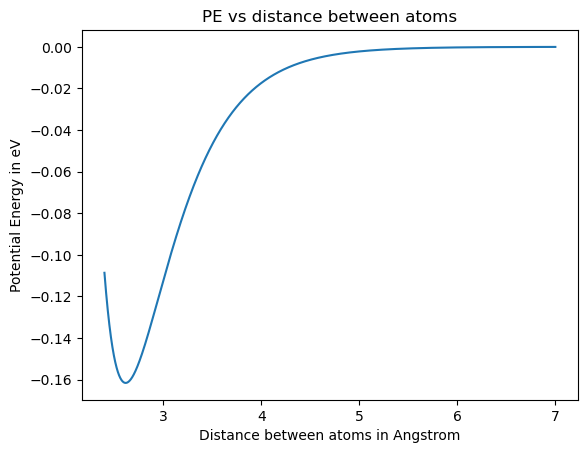

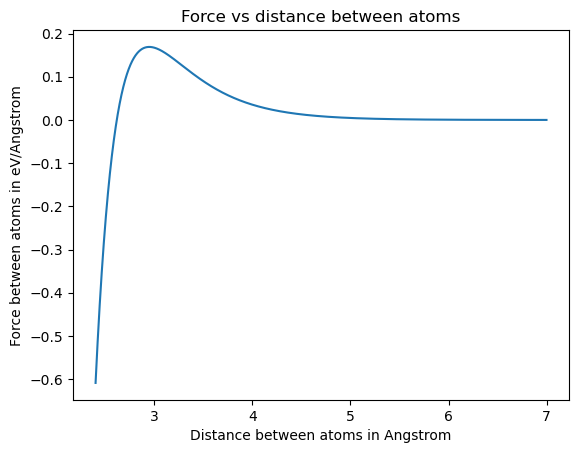

In [14]:
#Question 1 
#Part a -> plot the energy against distance

d = 0.001 #step size for iteration
a = 2.4 #starting distance
b = 7 #ending distance

def find_energy_array(a, b, d): #generates a list of energies for distances from a to b Angstroms split into d sized steps
    D = np.arange(a, b, d)
    E = np.zeros(len(D))
    for i in range(len(D)):
        E[i] = find_energy(D[i])
    return (D, E)

def plot_energy(D, E): #plots the energies generated
    plt.plot(D,E)
    plt.title("PE vs distance between atoms")
    plt.xlabel("Distance between atoms in Angstrom")
    plt.ylabel("Potential Energy in eV")
    plt.show()

#Part b -> plot the force against distance

def find_force(d): #find force between two atoms of distance d Angstroms apart
    d = d*Ang
    a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., d)])
    calc = Morse.MorsePotential()
    a.set_calculator(calc) 
    return (a.get_forces()[0,2])

def find_force_array(a, b, d): #generates a list of forces for distances from a to b Angstroms split into d sized steps
    D = np.arange(a, b, d)
    F = np.zeros(len(D))
    for i in range(len(D)):
        F[i] = find_force(D[i])
    return (D, F)

def plot_force(D,F): #plots the forces generated 
    plt.plot(D,F)
    plt.title("Force vs distance between atoms")
    plt.xlabel("Distance between atoms in Angstrom")
    plt.ylabel("Force between atoms in eV/Angstrom")
    plt.show()

#find D the array of distances, E the array of energies and F the array of forces
(D, E) = find_energy_array(a, b, d)
(D, F) = find_force_array(a, b, d)
#plot E and F against D
plot_energy(D, E)
plot_force(D, F)


In [15]:
#Question 2
 
x = np.argmin(E)
print("The distance at which there is minimum potential energy is %s Angstroms" % D[x])

The distance at which there is minimum potential energy is 2.615999999999976 Angstroms


### Task and Deliverable 2 

1. __Write a _unit test_ that verifies that the forces returned by the ```get_forces()``` function is really the negative gradient of the energy (as returned by the ```get_potential_energy()``` function) with respect to the atomic positions. Do this by comparing the forces returned by ```get_forces()``` to those obtained by numerical finite differences of energies between two sets of atomic positions, displaced by small amount.__

2. __Experiment with different values of $\epsilon$ and look at how accurate the approximation is as a function of $\epsilon$.__

3. __What goes wrong if you make $\epsilon$ too small?__

Hint:

Use the idea of the definition of the gradient and its relation to the Taylor expansion:

$$
\nabla f(x) \approx \frac{f(x+\epsilon)-f(x)}{\epsilon}
$$

With just two atoms in the "system", you can treat the energy and force as just functions of a scalar variable, the distance between the two atoms. More generally, both the energy and the forces are functions of many atomic coordinates, which we can collect into a vector $\bf{R}$, so the truncated Taylor expansion takes the form:

$$
\nabla f({\bf R})\cdot {\bf d} \approx \frac{f ({\bf R}+\epsilon {\bf d} )-f({\bf R})}{\epsilon}
$$

where ${\bf d}$ is the vector representing a small displacement. 

A graph is a good way to examine how the size of epsilon translates to the accuracy (error) of the approximation.


In [16]:
#Question 1

x = 4
ep = 0.00001

#approximate the force at x displacement with an epsilon value of ep
def get_force_from_energy(x, ep):
    e1 = find_energy(x)
    e2 = find_energy(x+ep)
    return (e2 - e1) / ep
    
force_from_energy = get_force_from_energy(x, ep)
force_from_get_forces = find_force(D[int((x - a) / d)])

print("For x = 4 and epsilon = 0.0000001:")
print("The force calculated from the gradient of the energy is %f eV/Angstrom" % force_from_energy)
print("The force found using the find_forces function is %f eV/Angstrom" % force_from_get_forces)
print("Ratio of force found using gradient of energy to that found from find_forces is: %f" % (force_from_energy/force_from_get_forces))

For x = 4 and epsilon = 0.0000001:
The force calculated from the gradient of the energy is 0.035305 eV/Angstrom
The force found using the find_forces function is 0.035306 eV/Angstrom
Ratio of force found using gradient of energy to that found from find_forces is: 0.999990


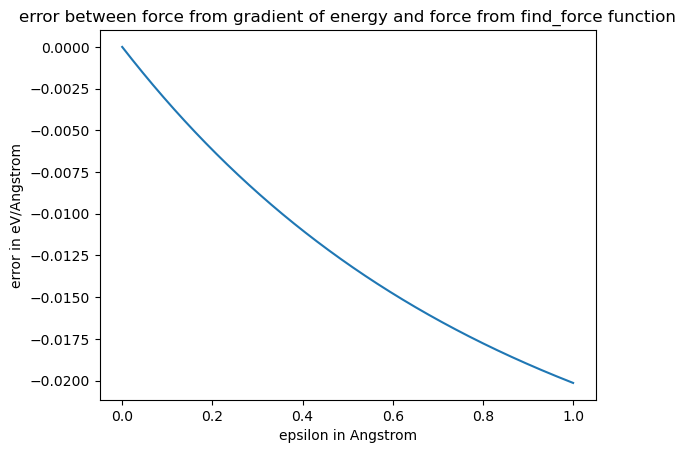

In [17]:
#Question 2

#from question one, it's clear that error reduces as epsilon gets smaller, but begins to have an error if it gets too small

n = 10000 #n steps
b = 1 #highest epsilon value

X = np.arange(1/n, 1+1/n, 1/n) #create array of values from 1 to n in steps of 1
error = np.zeros(n) #error is force from gradient of energy - force from find_force

force = find_force(D[int((x - a) / d)])
for i in range(n):
    error[i] = get_force_from_energy(x, X[i]) - force

plt.plot(X, error)
plt.title("error between force from gradient of energy and force from find_force function")
plt.xlabel("epsilon in Angstrom")
plt.ylabel("error in eV/Angstrom")
plt.show()

#clearly a lower value of epsilon reduces error

In [18]:
#Question 3

#error with epsilon = 1E-3
error1 = get_force_from_energy(x, 0.001) - force
print("error with epsilon = 1E-3 is %f eV/Angstrom" % error1)

#error with epsilon = 1E-6
error2 = get_force_from_energy(x, 0.000001) - force
print("error with epsilon = 1E-5 is %f eV/Angstrom" % error2)

#error with epsilon = 1E-12
error3 = get_force_from_energy(x, 0.000000000001) - force
print("error with epsilon = 1E-7 is %f eV/Angstrom" % error3)

#error with epsilon = 1E-24
error4 = get_force_from_energy(x, 0.000000000000000000000001) - force
print("error with epsilon = 1E-9 is %f eV/Angstrom" % error4)

print("If epsilon is too small, rounding errors will occur causing the error in force to actually increase")

error with epsilon = 1E-3 is -0.000035 eV/Angstrom
error with epsilon = 1E-5 is -0.000000 eV/Angstrom
error with epsilon = 1E-7 is 0.000006 eV/Angstrom
error with epsilon = 1E-9 is -0.035306 eV/Angstrom
If epsilon is too small, rounding errors will occur causing the error in force to actually increase


### Task 3

_Create a cubic unit cell of the Cu crystal, and extract some of its properties._

In order to investigate the properties of bulk copper, we need to model a large number of atoms. But evaluating the total potential energy of a large number of atoms takes a long time, and so we need a shortcut. In fact many simple properties of a crystalline solid can be evaluated by just considering its _unit cell_, i.e. the smallest repeating unit from which the crystal is made. This is typically true for static properties that do not depend on atoms experiencing a variety of neighbour environments, i.e. in the absence of _defects_. Such properties include the _lattice constant_ (i.e. the density), the _equation of state_, the _elastic constants_ (including the _bulk modulus_), the _Poisson ratio_, etc. 

The trick is to _assume_ that the atoms are arranged in perfect crystalline order, and only explicitly consider those atoms that are in a single unit cell. In order to correctly evaluate the energy, the _effect_ of atoms in neighbouring unit cells needs to be included, but this can be done by using [_periodic boundary conditions_](https://en.wikipedia.org/wiki/Periodic_boundary_conditions). The page behind the link is rather detailed, but think about the Fourier Series from IA maths, which was applicable to periodic functions, but you only ever had to consider the function values over a single period. This is similar. 

In the image below, the blue shaded area is the unit cell, its sides are the lattice vectors that generate the periodic images. 

![Periodic cells](./files/unitcell2.png)

More complicated properties, such as the _yield stress_, or those of more complicated materials such as _polycrystalline solids_ cannot be extracted from such small unit cells.

The crystal structure of Cu is face centered cubic, and ASE provides convenient constructors which assume periodic boundary conditions, unless instructed otherwise:

In [19]:
from ase.build import bulk
cu = bulk("Cu", "fcc", a=3.6, cubic=True)

![cu](./files/cu.png)

Although the smallest possible unit cell of an fcc crystal contains just one atom, it is often more convenient to work with the "cubic unit cell" which contains 4 atoms, but whose lattice vectors (which represent the displacements that correspond to the periodically repeating units) are just the sides of a cube, i.e. orthogonal and correspond to the x, y, and z axes. The size of the lattice vectors determine the volume of the unit cell and the corresponding density of material modelled. 

The fcc crystal you have seen before probably show an atom in each face of the cubic unit cell - but many of those are repeated periodic images of the ones shown above!

In ASE, the lattice vectors are stored, side-by-side, collected together in a 3x3 matrix called _cell_. So, the first column is the first lattice vector ($L_1$), the second column is the second lattice vector($L_2$), and the third column is the third lattice vector ($L_3$).

$$
\left[ \begin{matrix} L_{1x} &L_{2x} &L_{3x}\\ L_{1y} &L_{2y}&L_{3y}\\ L_{1z} &L_{2z}&L_{3z} \end{matrix}\right]
$$

In [20]:
cu.cell

Cell([3.6, 3.6, 3.6])

This returned a "Cell object", if we want to see the actual cell vectors, we need to convert it to an array.

In [21]:
np.array(cu.cell)

array([[3.6, 0. , 0. ],
       [0. , 3.6, 0. ],
       [0. , 0. , 3.6]])

There are indeed 4 atoms in this unit cell, with positions corresponding to the origin, and the centers of the sides of the unit cube on the YZ, ZX and XY planes:

In [22]:
cu.get_positions()

array([[0. , 0. , 0. ],
       [0. , 1.8, 1.8],
       [1.8, 0. , 1.8],
       [1.8, 1.8, 0. ]])

Verify that the periodic boundary conditions are implemented correctly by evaluating the potential energy of the unit cell, and comparing the potential energy per atom to that of a larger cell, which is obtained by replicating the original twice in each of the three directions. Since both smaller and larger cells represent an infinite, periodic array of copper atoms, the potential energy per atom should be the same. 

In [23]:
cu.set_calculator(calc)
print("Number of atoms: ", cu.get_global_number_of_atoms())
print("Potential energy per atom: ", cu.get_potential_energy()/cu.get_global_number_of_atoms())

Number of atoms:  4
Potential energy per atom:  -1.1699071927299534


In [24]:
cu222 = cu.copy()        # creating a copy of an Atoms object
cu222.set_calculator(calc) # copying DOES NOT bring the attached calculator, so we need to set it again
cu222 *= (2,2,2)         # replicating the unit cell is accomplished by the multiplying operator
print("Number of atoms: ", cu222.get_global_number_of_atoms())
print("Potential energy per atom: ", cu222.get_potential_energy()/cu222.get_global_number_of_atoms())

Number of atoms:  32
Potential energy per atom:  -1.1699071927299536


![cu222](./files/cu222.png)

Strain can be applied to the system by modifying (distorting) the unit cell appropriately. E.g. to apply 1% hydrostatic compression:

In [25]:
cell = cu.get_cell()
cell *= 0.99
cu.set_cell(cell, scale_atoms=True) # To apply strain, the atomic positions need to be scaled together with the unit cell 
cu.get_cell()

Cell([3.564, 3.564, 3.564])

In [26]:
cu.get_potential_energy()/cu.get_number_of_atoms()

/Users/eric/.local/lib/python3.11/site-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',


-1.1657718984261178

The stress on the system is given as a matrix, here we get it as a 3x3 matrix (ASE's default is to provide it in [Voigt notation](https://en.wikipedia.org/wiki/Voigt_notation))

In [27]:
cu.get_stress(voigt=False)

/Users/eric/.local/lib/python3.11/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


array([[-2.33782806e-02,  2.45243296e-18, -7.66385299e-19],
       [ 2.45243296e-18, -2.33782806e-02, -5.36469709e-19],
       [-7.66385299e-19, -5.36469709e-19, -2.33782806e-02]])

The stress, analogously to the force, is the derivative of the energy with respect to the unit cell vectors (or more precisely, with respect to the deformation strain applied to the unit cell vectors). Note how the off-diagonal elements of the stress matrix above are essentially zero and the diagonal elements are the same, i.e. the stress is the same in the X, Y, and Z directions, corresponding to the 1% hydrostatic compression that we applied above. 

### Deliverable 3

1. __Write a program that calculates and plots the potential energy and pressure (P) of the copper crystal as a function of volume by applying varying amounts of hydrostatic strain.__
2. __Calculate the [bulk modulus](https://en.wikipedia.org/wiki/Bulk_modulus) at the equilibrium volume. Compare it to the experimental value.__

Hints:

- Make sure you use a sensible range of strains, think about what would be reasonable in a real experiment
- For the plot, use both compressive and tensile strains. Make sure you plot against the volume, not against the strain itself.
- Remember that $K = -V dP/dV$ where $V$ is the volume, and that the pressure is related to the trace of the stress matrix (S), $P = - \frac{1}{3} \text{Tr}(S)$.
- Do not forget that energy and volume are extensive, so it is best to work with the per-atom quantities.
- Do not be surprised that you only get within the experimental value within 20% or so. 
- The experimental value for Bulk modulus is around 130 - 145 GPa. 

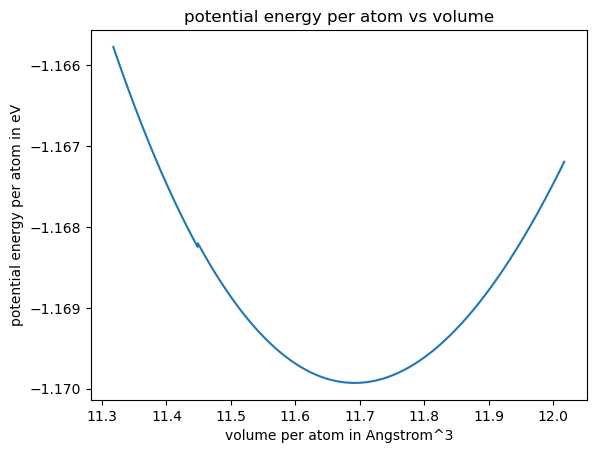

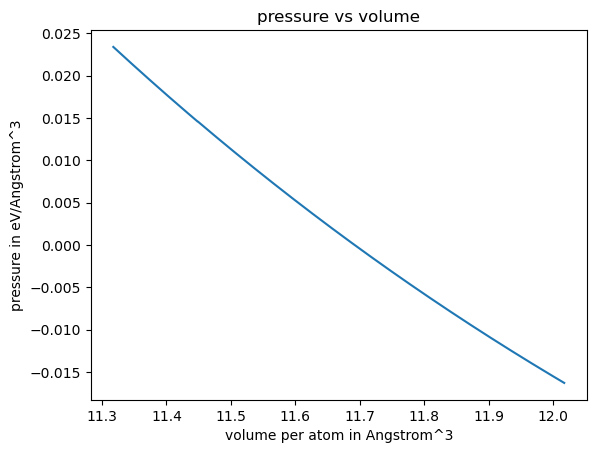

In [37]:
#Question 1

#initialise variables
a = 3.6
d = 0.00001
S = np.arange(-0.01, 0.01, d)
V = np.zeros(S.size)
P = np.zeros(S.size)
E = np.zeros(S.size)
#create copper crystal
cu = bulk("Cu", "fcc", a=a, cubic=True)
cu.set_calculator(calc)
n = cu.get_number_of_atoms()

for i in range(S.size):
    cell = [(a * (S[i] + 1))]*3
    cu.set_cell(cell, scale_atoms=True)
    V[i] = (cell[0]*cell[1]*cell[2])/n
    E[i] = cu.get_potential_energy()/n
    stress = cu.get_stress(voigt=False)
    P[i] = -1/3 * np.trace(stress)

plt.plot(V, E)
plt.title("potential energy per atom vs volume")
plt.xlabel("volume per atom in Angstrom^3")
plt.ylabel("potential energy per atom in eV")
plt.show()

plt.plot(V, P)
plt.title("pressure vs volume")
plt.xlabel("volume per atom in Angstrom^3")
plt.ylabel("pressure in eV/Angstrom^3")
plt.show()


In [38]:
#Question 2

#find equilibrium volume
x = np.argmin(E)
dpdv = (P[x + 1] - P[x])/(V[x + 1] - V[x])
k = - V[x] * dpdv
print("The equilibrium volume is at %f Angstrom^3" % (V[x]))
print("The bulk modulus is %f GPa" % (k/GPa))
print("The bulk modulus found here is roughly the same as the experimental value")

The equilibrium volume is at 11.692016 Angstrom^3
The bulk modulus is 103.807707 GPa
The bulk modulus found here is roughly the same as the experimental value


Bulk modulus:  102.96404758170398 GPa


<Axes: title={'center': 'birchmurnaghan: E: -1.170 eV, V: 11.692 Å$^3$, B: 102.964 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

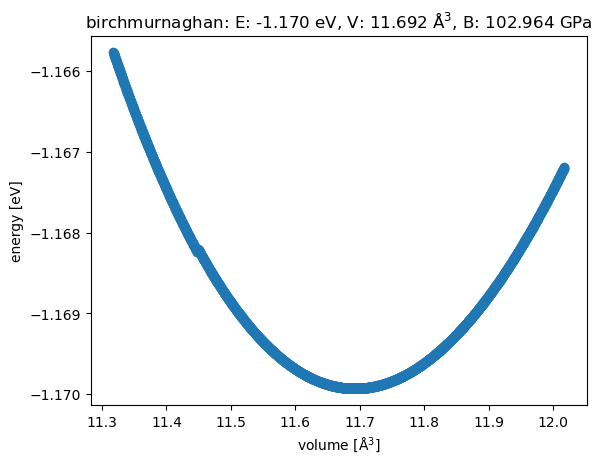

In [39]:
# Those who browse the documentation of ASE can discover that it has functionality to fit the equation of state
# and extract parameters using more accurate methods. Compare your result above to those computed by ASE. 

# The call below takes two arrays: the variable V is an array of volumes/atom and E
# is an array of corresponding potential energy values, again per atom. If you want to execute this
# notebook cell, you will need to substitute your own arrays for V and E.
from ase.eos import EquationOfState
from ase.units import kJ
eos = EquationOfState(V, E, eos="birchmurnaghan") # Birch-Murnaghan is a particular functional form fitted to the equation of state
v0, e0, B = eos.fit()
print('Bulk modulus: ', B / kJ * 1.0e24, 'GPa')
eos.plot()

### Task and Deliverable 4 

1. __Write a program to compute the [shear modulus](https://en.wikipedia.org/wiki/Shear_modulus).__

Hint: You can apply a shear in the XY plane by modifying the X component of the lattice vector that points originally in the Y direction, i.e. $L_{2x}$. Apply _small_ amounts of shear, i.e. a few percent. Starting with a cubic cell with side lengths L, new cell matrix, after applying 1% shear in the XY plane, would be given by

$$
\left[\begin{matrix}
L & 0.01L & 0\\0&L&0\\ 0&0&L
\end{matrix}\right]
$$

Just as before, in the hydrostatic case, after applying the shear strain in this way, you can get the corresponding (shear) stress simply by calling the ```get_stress()``` function. Observe which components of the stress matrix is nonzero, and think about which one you need to work out the shear modulus. 

The computed shear modulus of this model deviates from the experimental value by quite a bit more than the bulk modulus - this is typical for such simple models. 

2. __Write a program to determine the [Poisson ratio](https://en.wikipedia.org/wiki/Poisson%27s_ratio)__

Hint: Recall that if the system is strained in the X direction by a normal strain (not shear), the resulting stress will not be purely in the X direction, but in addition to the stress in X there will be stress in the Y and Z directions also. If you now strain the system in an _equibiaxial_ way, so some amount of strain in X, and equal amounts in Y and Z, that is different from the strain in X, the Poisson ratio is the ratio of X and Y(and Z) strains that lead to no stress in the Y (and Z) directions. 

- Think about the sign of the X strain and the Y(and Z) strains.
- Make sure you use a sensible range of strains. 
- The Poisson ratio depends very sensitively on the starting volume, so make sure you use the unit cell size that corresponds to the lowest energy, accurate to at least 4 decimal places. 
- You should get a computed value that is within 10% of the experimentally observed one. 
- The experimental value for Poisson ratio is around 0.34 - 0.36 and around 44 - 49 GPa for the Shear modulus. 
- Note that ASE results the mathematical shear strain ($\varepsilon$), not the engineering shear strain ($\gamma$).


In [41]:
#Question 1

#set atoms to equilibium
l = (a * (S[x] + 1))
cell = [l]*3
cu.set_cell(cell, scale_atoms=True)

#apply shear
s = 0.01
cell = np.array(cu.get_cell())
cell[0][1] = s * cell[0][0]
print(cell)
cu.set_cell(cell, scale_atoms=True)

#calculate shear modulus
stress = cu.get_stress(voigt=False)
f = stress[0][1]
G = f / (cell[0][1] / l)/2
print("The shear modulus is %f GPa" % (G/GPa))

[[3.60288   0.0360288 0.       ]
 [0.        3.60288   0.       ]
 [0.        0.        3.60288  ]]
The shear modulus is 42.732487 GPa


In [32]:
#Question 2

#set atoms to equilibium
cell = [l]*3
cu.set_cell(cell, scale_atoms=True)

#apply strain
s = 0.01
cell = np.array(cu.get_cell())
cell[0][0] = (1+s) * cell[0][0]
cu.set_cell(cell, scale_atoms=True)

#calculate horizontal strain necessary for no stress after vertical strain
n = 100
lat_stress = np.zeros(n)
for i in range(n):
    x = i/n*0.001
    cell = np.array(cu.get_cell())
    cell[1][1] = (1-x) * l
    cell[2][2] = (1-x) * l
    cu.set_cell(cell, scale_atoms=True)
    lat_stress[i] = cu.get_stress(voigt=False)[1][1]
    
i = np.argmin(lat_stress**2)
print("The poissons ratio is %f" % (lat_stress[i]/s))


The poissons ratio is 0.371796


#### Comparison to experiment

You will note that there are significant discrepancies from the experimental values of the elastic properties. Some of this is due to the simplicity of the Morse potential, but not all of it. 

- The simple calculations you did apply to a "single crystal" of the material, where we assume that the entire extent of the material is just periodic copies of the same unit cell. In reality a typical piece of copper would have many grains, each of which are single crystals, but they are oriented randomly, so anything you measure on the sample is a rotationally averaged quantity. 
- It turns out that the elastic properties do depend on the orientation, so our single crystal model behaves quite differently from a rotationally averaged system.
- For example, the simple relationship that you know between the bulk modulus, shear modulus and the Poisson ratio only holds for isotropic materials (so including polycrystalline materials, because of the rotational averaging), and we don't expect it to hold for the single crystal.
- What is the deviation of the above results from the simple relationship between the three elastic properties? Which is the one that is most different from the experimental polycrystalline value? 

In [4]:
# The shear modulus deviated by around 30 GPa, the poissons ratio deviated by 0.01. The shear modulus deviated by a lot more than the poissons ratio

### Deliverable 5: Tension experiment with a notch

![bar](./files/bar_annotated.png)


The same model can be used for simulation of more complex, larger scale geometries, e.g. the the situation shown below, which shows a slab with notch being pulled from at the top and bottom. In order to speed up the computation, we employ periodic boundary conditions in one of the directions (Z) that is perpendicular to the direction that you will apply the strain along (X). The atoms are coloured according to their energy (blue is lowest, red is highest, green is in between). As the load is applied, instead of following the evolution of the atomic positions in time, we optimise the positions to find the lowest energy state corresponding to each particular applied strain. This can be accomplished much more quickly using sophisticated optimisation techniques (which you might learn more about in Part IIA), rather than by integrating forward the equations of motion for the atoms.

Please write out answers to the following questions (bulletpoints are accepted):

1. __Take a look at the [animation](https://deepnote.com/project/02a51db6-fc97-4151-b517-6482c8fdf794#%2FMorse2d_video.mp4) and identify the dislocations that are nucleating.__<br>
(If the link doesn't work, download the file directly from the same directory this notebook is in [see top right folder icon])

2. __Describe what happens to the dislocation subsequent to nucleation: how do the dislocations and free surfaces interact? What happens to the dislocations that reach the fixed part of the bar that corresponds to the "grips" in the experiment?__ 
3. __What happens to the notch?__

*Note that you have observed only one kind of process, dislocation nucleation and glide. In a real material, or a more realistic model, there will be many different kinds of plastic processes. Some take more time than what you are able to simulate, some need preexisting flaws to start, some need multiple crystal grains and the grain boundaries between them, some need a more realistic length scale to be modelled.*


#Question 1
- Dislocations start around the center of the crack and moves in a straight line
#Question 2
- Dislocations move in a straight line until it reaches a surface
- When the dislocation reaches a fixed part of the bar it stops and becomes a region of high energy, which can nucleate another dislocation that moves in another direction
- When the dislocation reaches a free surface, it's energy is dissipated and it changes the shape of the surface
#Question 3
- The notch starts growing a crack which increases in size as more and more dislocations are nucleated

--- *end of laboratory exercise* ---

## Optional extensions

You are also supplied an [example program](files/run_cu_bar_notch_2d_qs.py) which creates an atomistic model representing a notched bar and runs the simulation that produced the above animation. You can run the program yourself, and in order to visualize the output trajectory of the atoms, download and install [Ovito](https://ovito.org), an atomistic visualisation tool. In Ovito you can open the trajectory file that is produced (ending with ```.xyz```), then you will need to check the "File contains multiple timesteps" checkbox on the right under the "XYZ File" heading, so that the animation controls to activate. The best way to see where deformation takes place is to colour the atoms according to their atomic energy, you can accomplish this by clicking on "Add Modification" in the top right panel, selecting "Color coding", and then selecting the "Potential energy" property from the dropdown menu, then click on "Adjust range".

_Note: the simulation with the default parameters can take several hours to run, depending on the speed of your computer, but you can visualise the trajectory while it is being generated. Clicking the "Reload animation frames" button under the "External data sources" tab loads the most recent version of the trajectory file into Ovito._


__Change the simulation to alter the width and/or length of the initial notch, and run the simulation again. How does the critical strain change?__

__Modify the program to create an empty void in the middle of the bar (which is another typical flaw found in metals), instead of the two notches. Observe the evolution of the shape of the bar and the void during the tension experiment. What happens to the volume of the void?__

__Inspect the code to figure out how constraints are applied to the system (there is also documentation of this on the ASE homepage), and use it to model an inclusion in the middle of system by a block of rigid atoms whose positions are fixed throughout the simulation. How does this affect the dislocations?__


If you want to how a non-metal behaves under the same conditions, and you manage to install the [QUIP and quippy packages](https://github.com/libatoms/quip) (tested on MacOS and Linux), then you can run this [modified program](./files/run_si_bar_notch_2d_qs.py) that simulates the tension experiment on a model of silicon, rather than copper, leading to qualitatively different results... 

The above simulations neglected the effect of temperature: only those processes happenned that were not hampered by an energy barrier. There are many small energy barriers in this system, and at finite temperature, given enough time, the system overcomes those barriers. You can simulate this effect by writing a program that integrates Newton's law of motion for the atoms using the velocity-Verlet algorithm and the forces on the atoms returned by the atomistic model. This is called *molecular dynamics*. Because atoms are light and the forces on the large, you need to use a time step on the order of 1 fs ($10^{-15}$ seconds, but be careful about the units of the atomic positions and the forces returned by ASE). In order to see something happenning in a reasonable time, it helps if you try rather high temperature!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00126201-02a2-4655-9b63-1cb17da75327' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>